C:\Users\vange\AppData\Local\Temp\ipykernel_22344\2281092268.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance_counts.index, y=distance_counts.values, palette='Reds')


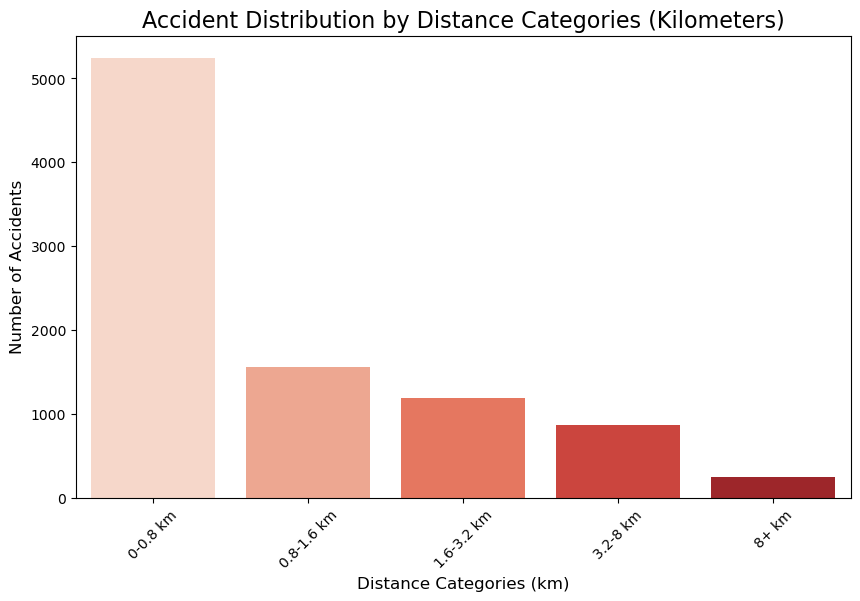

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the cleaned accidents dataset
file_path = r"C:\Users\vange\Desktop\Car Accidents\Car-Accidents\3. Data Cleaning\cleaned_accidents.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Filter out zero distances (if necessary)
df = df[df['Distance(mi)'] > 0]

# Convert Distance(mi) to kilometers
df['Distance(km)'] = df['Distance(mi)'] * 1.60934

# Define custom bins for distance categories in kilometers
bins_km = [0, 0.8, 1.6, 3.2, 8, df['Distance(km)'].max()]
labels_km = ['0-0.8 km', '0.8-1.6 km', '1.6-3.2 km', '3.2-8 km', '8+ km']
df['Distance_Category'] = pd.cut(df['Distance(km)'], bins=bins_km, labels=labels_km, include_lowest=True)

# Count the number of accidents in each category
distance_counts = df['Distance_Category'].value_counts().sort_index()

# Plot the distribution of accidents across distance categories
plt.figure(figsize=(10, 6))
sns.barplot(x=distance_counts.index, y=distance_counts.values, palette='Reds')

# Customize the plot
plt.title('Accident Distribution by Distance Categories (Kilometers)', fontsize=16)
plt.xlabel('Distance Categories (km)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()
